# Exploring the Data
This notebook is intended to explore the immediate interest points of our dataset, particularly the review text.

In [57]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from scripts import project_functions

In [8]:
data = project_functions.load_and_process('..\..\data\data_raw\*.csv')

The main focus of our research is in the review text. As such, we want to learn as much as possible about this column early on.

The first step is determining how long reviews are on average:

Text(0, 0.5, 'Frequency')

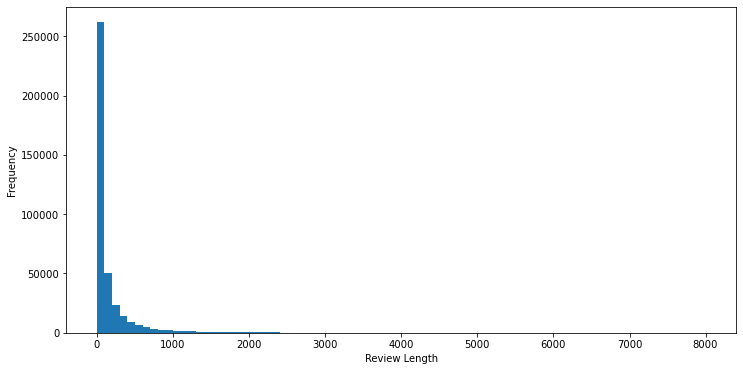

In [32]:
review_lengths = data['review'].apply(lambda x: len(str(x)))

# full graph
rlplot = review_lengths.plot(kind='hist', bins=80, figsize=(12,6))
rlplot.set_xlabel("Review Length")
rlplot.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

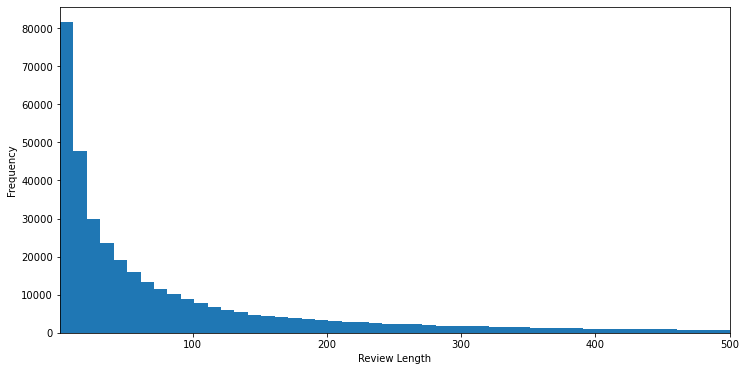

In [36]:
# zoomed in
rlplotz = review_lengths.plot(kind='hist', bins=800, figsize=(12,6))
rlplotz.set_xlim(1,500)
rlplotz.set_xlabel("Review Length")
rlplotz.set_ylabel("Frequency")

These graphs - the first one showing the entire range of lengths, and the second showing a zoomed in view of max 500 characters - are a clear indication that the vast majority of steam reviews are very brief, often less than 10 characters. This begs the question: what could users possibly be entering with such tiny messages?

The next analysis will be a simplistic comparison of the most common review messages, matching exact text between reviews (but ignoring capitalization and whitespace). My guess is that with so many reviews being incredibly short, it is quite likely that many users are entering the same word or phrase for their reviews.

['good', 'yes', 'good game', 'fun', 'great game', 'nice', '.', 'nan', 'its good', 'very good'] [5533, 5024, 4087, 2613, 2226, 1567, 1507, 1007, 995, 811]


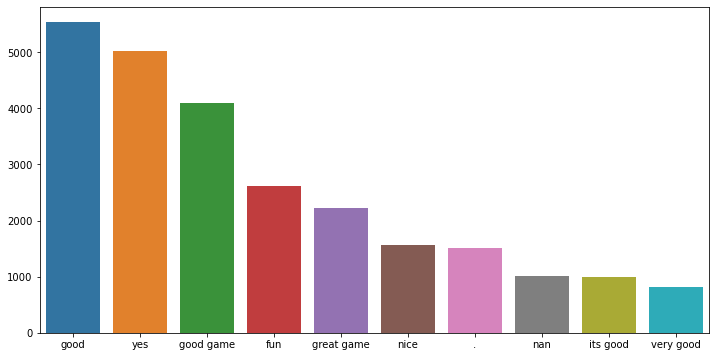

In [102]:
review_text = data['review'].apply(lambda x: str(x).lower().strip())

counter = Counter(review_text)
top = dict(counter.most_common(10))
reviews = list(top.keys())
counts = list(top.values())
print(reviews, counts)

plt.figure(figsize=(12,6))
rtplot = sns.barplot(x=reviews, y=counts)

Sure enough, the top 10 most common reviews are all at most 10 characters long, and indeed, they are frequently recurring! Interestingly, one of the top values is simply a period - I guess some (many!) people didn't feel like writing any words at all! This simple analysis also revealed a potential issue with the data - a review text value of "nan" showing up very frequently is most likely an issue with the data that should be cleaned out when we do our proper analysis.

This brief exploration of the data has already given some discussion-worthy talking points, which makes me confident about the quality of our research goals and dataset. I look forward to correlating these results to the other data fields we have access to!

One of the most promising such fields is the Steam algorithm score - how interesting is it to compare our own results to those of Steam's actual algorithm! I'll finish this notebook with a domain analysis of the Steam algorithm scores:

Min: 0.0
Max: 0.98


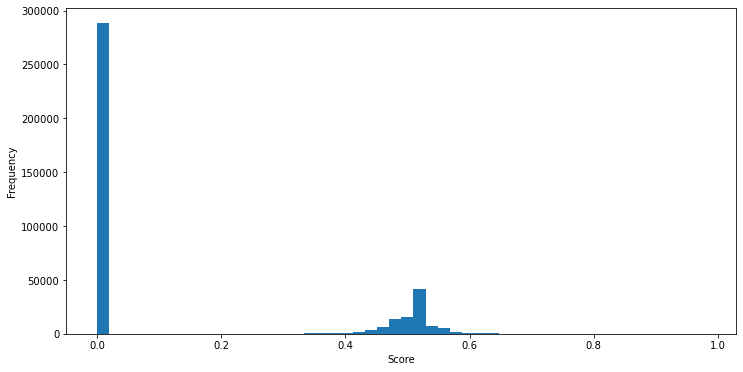

In [118]:
steam_scores = data['steam_algorithm_score'].apply(lambda x: round(float(x), 2))
ssplot = steam_scores.plot(kind='hist', bins=50, figsize=(12,6))
ssplot.set_xlabel("Score")
ssplot.set_ylabel("Frequency")
print('Min:', steam_scores.min())
print('Max:', steam_scores.max())

Clearly the algorithm tends heavily towards the middle of the spectrum - though a score of 0 dominates the vast majority of reviews. This might indicate the need to look into how the algorithm works - does it just set review scores to 0 when they fail to pass some minimum requirements for consideration? Or is this a case of old reviews not receiving a score due to existing prior to the implementation of the algorithm?

If the majority of reviews are not even receiving a score above 0, this might diminish the usefulness of this data. Nonetheless, there are still nearly 100,000 reviews with actual scores, so this may not be a concern.